# Classification

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных

In [36]:
df = pd.read_csv('iris.csv')

In [37]:
# оставляем только два вида ирисов для бинарной классификации (изначально было три)
df = df[df['species'] != 'virginica']

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


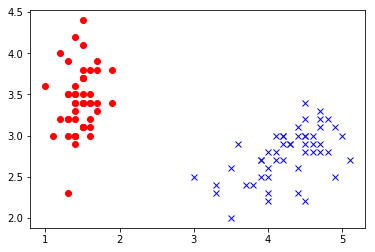

In [39]:
# визуализируем данные для setosa красным
x_setosa = df[df['species'] == 'setosa']['petal_length']
y_setosa = df[df['species'] == 'setosa']['sepal_width']
plt.plot(x_setosa, y_setosa, 'ro')

# визуализируем данные для versicolor красным
x_versicolor = df[df['species'] == 'versicolor']['petal_length']
y_versicolor = df[df['species'] == 'versicolor']['sepal_width']
plt.plot(x_versicolor, y_versicolor, 'bx')

plt.show()

In [40]:
x_setosa

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.5
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal_length, dtype: float64

In [41]:
df = df[['petal_length', 'sepal_width', 'species']] # оставляем только два параметра
df = df.sample(frac=1) # перемешиваем данные
df['species'] = df['species'].astype('category').cat.codes # кодируем setosa и versicolor как 0 и 1
df.head()

,petal_length,sepal_width,species
13,1.1,3.0,0
32,1.5,4.1,0
91,4.6,3.0,1
71,4.0,2.8,1
22,1.0,3.6,0


In [42]:
# отделяем features и labels
X = np.array(df[['petal_length', 'sepal_width']].T, dtype=np.float128)
Y = np.array(df['species'], dtype=np.float128)
Y = np.reshape(Y, (1, 100))
print(X.shape)
print(Y.shape)

(2, 100)
(1, 100)


## Net input

$$ z = \sum{wx} + b $$

In [43]:
def net_input(W, X, b):
    return np.dot(W, X) + b

## Sigmoid

$$ f(z) = \frac{1}{1 + e^{-z}} $$

In [44]:
def sigmoid(Z):
    return 1.0/(1 + np.exp(-Z))

## Predict

Предсказываем класс 1, если модель уверена в ответе "1" более, чем на 50%, иначе 0.

In [45]:
def predict(s):
    if s > 0.5:
        return 1
    else:
        return 0

## Cost function

$$ L(\hat{y}, y) = - \frac{1}{m} \sum{y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}}$$

In [46]:
def cost_function(W, X, b, Y):
    return -np.sum(Y * np.log(sigmoid(net_input(W, X, b))) + (1 - Y) * np.log(1 - sigmoid(net_input(W, X, b)))) / X.shape[1]

## Производные

$$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum{(\hat{y} - y) x} $$

In [47]:
def cost_function_derivative_w(W, X, b, Y):
    return np.dot(sigmoid(net_input(W, X, b)) - Y, X.T) / X.shape[1]

$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum{(\hat{y} - y)} $$

In [48]:
def cost_function_derivative_b(W, X, b, Y):
    return np.sum(sigmoid(net_input(W, X, b)) - Y) / X.shape[1]

## Accuracy

Доля правильно предсказанных ответов

In [49]:
def accuracy(Y_hat, Y):
    return np.sum(Y_hat == Y) / len(Y)

In [50]:
print(X.shape)
print(Y.shape)

X.shape
Y.shape

W = np.zeros((1, X.shape[0]))
b = 0

NUM_ITERATIONS = 1000
LEARNING_RATE = 10e-2

for i in range(NUM_ITERATIONS):
    print('{} step'.format(i))
    print(cost_function(W, X, b, Y))
    W = W - LEARNING_RATE * cost_function_derivative_w(W, X, b, Y)
    b = b - LEARNING_RATE * cost_function_derivative_b(W, X, b, Y)
    Y_pred = np.array([1 if sigmoid(net_input(W, x, b)) > 0.5 else 0 for x in X.T])
    print('Accuracy: {}'.format(accuracy(Y_pred, Y)))
    
print(sigmoid(net_input(W, X, b)))

(2, 100)
(1, 100)
0 step
0.69314718055994530943
Accuracy: 50.0
1 step
0.64571490216792524976
Accuracy: 55.0
2 step
0.60893873643935412734
Accuracy: 81.0
3 step
0.576923251401978921
Accuracy: 97.0
4 step
0.5479028931604707948
Accuracy: 100.0
5 step
0.5212457649615892556
Accuracy: 100.0
6 step
0.49664181830107476592
Accuracy: 100.0
7 step
0.4738817401974451822
Accuracy: 100.0
8 step
0.45279509317685252785
Accuracy: 100.0
9 step
0.43323226970116351966
Accuracy: 100.0
10 step
0.41505871562474464908
Accuracy: 100.0
11 step
0.3981526259386423135
Accuracy: 100.0
12 step
0.3824036303209771995
Accuracy: 100.0
13 step
0.36771177054076421348
Accuracy: 100.0
14 step
0.35398658104343821686
Accuracy: 100.0
15 step
0.34114622825934329018
Accuracy: 100.0
16 step
0.32911670281140273115
Accuracy: 100.0
17 step
0.3178310670792491704
Accuracy: 100.0
18 step
0.3072287605817555834
Accuracy: 100.0
19 step
0.29725496384330923045
Accuracy: 100.0
20 step
0.28786001963418790414
Accuracy: 100.0
21 step
0.27899890

Accuracy: 100.0
232 step
0.03651825611077043295
Accuracy: 100.0
233 step
0.036374183996273612246
Accuracy: 100.0
234 step
0.036231295799087298465
Accuracy: 100.0
235 step
0.03608957687180866092
Accuracy: 100.0
236 step
0.035949012807987342347
Accuracy: 100.0
237 step
0.03580958943719406425
Accuracy: 100.0
238 step
0.035671292820209692557
Accuracy: 100.0
239 step
0.035534109244331350046
Accuracy: 100.0
240 step
0.03539802521879227192
Accuracy: 100.0
241 step
0.03526302747029220694
Accuracy: 100.0
242 step
0.035129102938635268416
Accuracy: 100.0
243 step
0.03499623877247223826
Accuracy: 100.0
244 step
0.03486442232514442207
Accuracy: 100.0
245 step
0.034733641150626244623
Accuracy: 100.0
246 step
0.034603882999563864265
Accuracy: 100.0
247 step
0.034475135815407168917
Accuracy: 100.0
248 step
0.03434738773063259983
Accuracy: 100.0
249 step
0.03422062706305432774
Accuracy: 100.0
250 step
0.034094842312221383256
Accuracy: 100.0
251 step
0.0339700221558984171
Accuracy: 100.0
252 step
0.0338

Accuracy: 100.0
409 step
0.02171430370660535116
Accuracy: 100.0
410 step
0.021665913671278770592
Accuracy: 100.0
411 step
0.021617750800520102771
Accuracy: 100.0
412 step
0.021569813478396278383
Accuracy: 100.0
413 step
0.021522100104332520939
Accuracy: 100.0
414 step
0.02147460909292999601
Accuracy: 100.0
415 step
0.021427338873786053709
Accuracy: 100.0
416 step
0.021380287891317022047
Accuracy: 100.0
417 step
0.021333454604583508671
Accuracy: 100.0
418 step
0.021286837487118169818
Accuracy: 100.0
419 step
0.021240435026755905813
Accuracy: 100.0
420 step
0.021194245725466443449
Accuracy: 100.0
421 step
0.021148268099189266076
Accuracy: 100.0
422 step
0.021102500677670853147
Accuracy: 100.0
423 step
0.021056942004304191555
Accuracy: 100.0
424 step
0.02101159063597052192
Accuracy: 100.0
425 step
0.02096644514288328351
Accuracy: 100.0
426 step
0.020921504108434222276
Accuracy: 100.0
427 step
0.020876766129041627175
Accuracy: 100.0
428 step
0.020832229814000660315
Accuracy: 100.0
429 step

Accuracy: 100.0
588 step
0.0156010088157001727446
Accuracy: 100.0
589 step
0.015576960247072882451
Accuracy: 100.0
590 step
0.0155529902037901917614
Accuracy: 100.0
591 step
0.015529098296151019293
Accuracy: 100.0
592 step
0.015505284137043789361
Accuracy: 100.0
593 step
0.01548154734192489899
Accuracy: 100.0
594 step
0.015457887528797399846
Accuracy: 100.0
595 step
0.015434304318189892322
Accuracy: 100.0
596 step
0.015410797333135629652
Accuracy: 100.0
597 step
0.015387366199151829406
Accuracy: 100.0
598 step
0.015364010544219189904
Accuracy: 100.0
599 step
0.01534072999876160941
Accuracy: 100.0
600 step
0.015317524195626105631
Accuracy: 100.0
601 step
0.015294392770062933142
Accuracy: 100.0
602 step
0.015271335359705896676
Accuracy: 100.0
603 step
0.015248351604552857761
Accuracy: 100.0
604 step
0.015225441146946432786
Accuracy: 100.0
605 step
0.0152026036315548799984
Accuracy: 100.0
606 step
0.015179838705353173566
Accuracy: 100.0
607 step
0.015157146017604262349
Accuracy: 100.0
608

Accuracy: 100.0
761 step
0.012351255324959457691
Accuracy: 100.0
762 step
0.01233661067037063886
Accuracy: 100.0
763 step
0.012322002920021298698
Accuracy: 100.0
764 step
0.012307431932317528342
Accuracy: 100.0
765 step
0.012292897566393708054
Accuracy: 100.0
766 step
0.012278399682107814894
Accuracy: 100.0
767 step
0.012263938140036766805
Accuracy: 100.0
768 step
0.012249512801471802576
Accuracy: 100.0
769 step
0.01223512352841389752
Accuracy: 100.0
770 step
0.012220770183569214405
Accuracy: 100.0
771 step
0.012206452630344589481
Accuracy: 100.0
772 step
0.012192170732843053133
Accuracy: 100.0
773 step
0.0121779243558593849555
Accuracy: 100.0
774 step
0.012163713364875702917
Accuracy: 100.0
775 step
0.0121495376260570862155
Accuracy: 100.0
776 step
0.01213539700624723171
Accuracy: 100.0
777 step
0.012121291372964143468
Accuracy: 100.0
778 step
0.012107220594395855185
Accuracy: 100.0
779 step
0.012093184539396185218
Accuracy: 100.0
780 step
0.012079183077480523848
Accuracy: 100.0
781 s

## Scikit-learn

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()
clf.fit(X.T, Y.T.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
X.T

array([[1.1, 3. ],
       [1.5, 4.1],
       [4.6, 3. ],
       [4. , 2.8],
       [1. , 3.6],
       [1.5, 3.8],
       [4.4, 2.3],
       [4.2, 3. ],
       [4.5, 2.8],
       [1.2, 3.2],
       [1.2, 4. ],
       [4.4, 3.1],
       [1.7, 3.9],
       [1.5, 3.1],
       [1.5, 3.7],
       [4. , 2.3],
       [1.4, 3.4],
       [1.4, 3.5],
       [4.7, 3.3],
       [5.1, 2.7],
       [4.9, 2.5],
       [1.5, 3.5],
       [3.6, 2.9],
       [1.4, 4.2],
       [1.3, 3. ],
       [4.2, 2.9],
       [1.3, 3.2],
       [1.6, 3.2],
       [1.5, 3.1],
       [3.9, 2.7],
       [3.7, 2.4],
       [4. , 2.2],
       [4.1, 2.7],
       [1.5, 3.1],
       [1.5, 4.4],
       [4.3, 2.9],
       [1.4, 3.4],
       [4.7, 3.2],
       [4.5, 3.4],
       [1.4, 3. ],
       [1.6, 3.4],
       [4.7, 2.8],
       [1.3, 3.2],
       [1.6, 3.4],
       [1.7, 3.8],
       [4.1, 3. ],
       [5. , 3. ],
       [4.4, 3. ],
       [1.7, 3.3],
       [4.5, 2.9],
       [1.4, 3.2],
       [3. , 2.5],
       [3.9,

In [56]:
y_pred = clf.predict([[500, 6.5]])

In [57]:
y_pred

array([1.], dtype=float128)